#**Addressing Class Imbalance in Loan Default Prediction Using Machine Learning Algorithms**

Data Processing

Raw Data Handling

In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/Loan_Default.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Data Cleaning

In [ ]:
# Check the current data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
# Convert categorical columns to 'category' dtype
categorical_cols = ['Gender', 'loan_type', 'loan_purpose', 'business_or_commercial',
                     'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
                     'credit_type', 'co-applicant_credit_type', 'Region', 'Security_Type', 'loan_limit','age','total_units'] # Removed 'Status' from this list

df[categorical_cols] = df[categorical_cols].astype('category')

# Convert numerical columns to 'float' or 'int' dtype
# Here, we convert columns to 'float' as an example. Adjust as needed.
numerical_cols = [ 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
                   'Upfront_charges', 'term', 'property_value',  'income', 'Credit_Score','LTV']

df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Convert 'year' to integer
df['year'] = df['year'].astype(int)

# Convert 'Status' to binary if needed (e.g., 0 and 1 for classification)
df['Status'] = df['Status'].fillna(0).astype(int) # Fill NaN values with 0


In [ ]:
# Check data types again to confirm conversions
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ID                         148670 non-null  int64   
 1   year                       148670 non-null  int64   
 2   loan_limit                 145326 non-null  category
 3   Gender                     148670 non-null  category
 4   approv_in_adv              147762 non-null  object  
 5   loan_type                  148670 non-null  category
 6   loan_purpose               148536 non-null  category
 7   Credit_Worthiness          148670 non-null  object  
 8   open_credit                148670 non-null  object  
 9   business_or_commercial     148670 non-null  category
 10  loan_amount                148670 non-null  int64   
 11  rate_of_interest           112231 non-null  float64 
 12  Interest_rate_spread       112031 non-null  float64 
 13  Upfront_charge

In [ ]:
# Check for missing values after type conversion
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


Missing/Null Value Treatment

In [ ]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing values before handling:")
print(missing_values)

# Replace numerical missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Drop rows where 'Status' (target variable) is missing
if 'Status' in df.columns:
    df.dropna(subset=['Status'], inplace=True)

# Check for missing values again after handling
missing_values_after = df.isna().sum()
print("Missing values after handling:")
print(missing_values_after)


Missing values before handling:
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                    

In [ ]:
# Check the cleaned dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ID                         148670 non-null  int64   
 1   year                       148670 non-null  int64   
 2   loan_limit                 145326 non-null  category
 3   Gender                     148670 non-null  category
 4   approv_in_adv              147762 non-null  object  
 5   loan_type                  148670 non-null  category
 6   loan_purpose               148536 non-null  category
 7   Credit_Worthiness          148670 non-null  object  
 8   open_credit                148670 non-null  object  
 9   business_or_commercial     148670 non-null  category
 10  loan_amount                148670 non-null  int64   
 11  rate_of_interest           148670 non-null  float64 
 12  Interest_rate_spread       148670 non-null  float64 
 13  Upfront_charge

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,6883.647811,699.789103,72.989111,0.246445,37.938508
std,42917.476598,0.0,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,6300.067060,115.875857,37.890714,0.430942,9.663417
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Drop Irrelevant Columns

In [ ]:
# Drop columns not needed for model
df.drop(columns=['submission_of_application', 'dtir1'], inplace=True)

In [ ]:
# Drop columns not needed for model
df.drop(columns=['year'], inplace=True)

Exploratory Data Analysis(EDA)

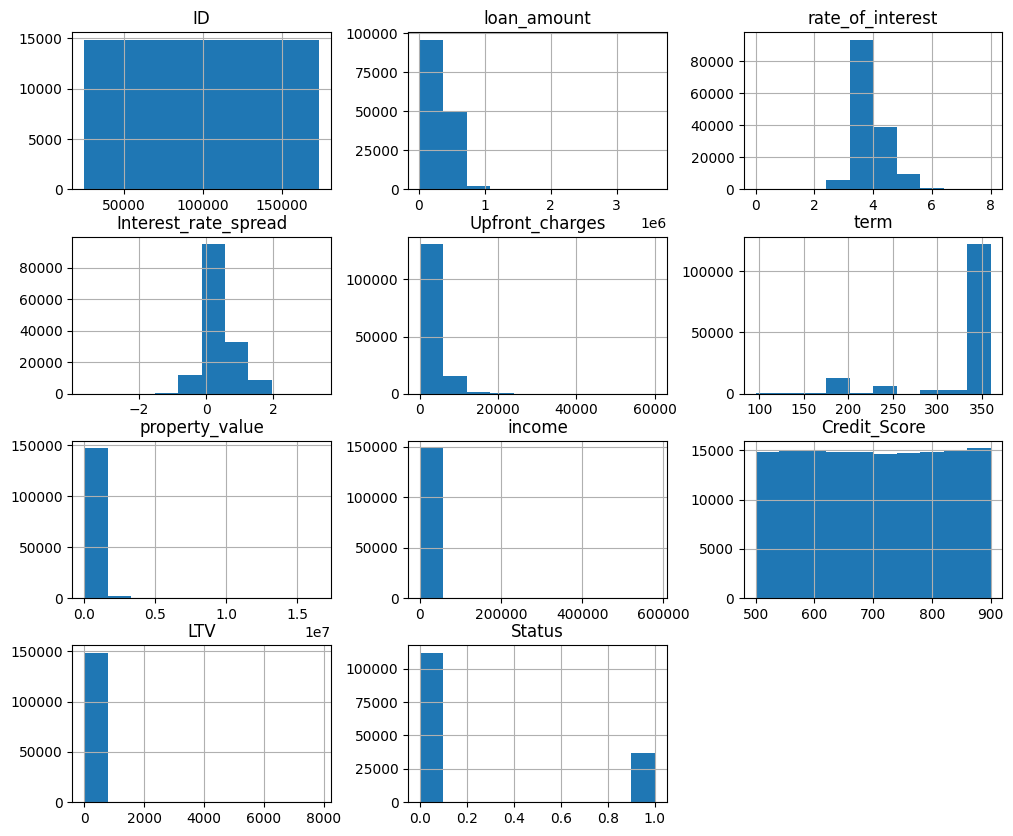

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
df.hist(figsize=(12, 10))
plt.show()

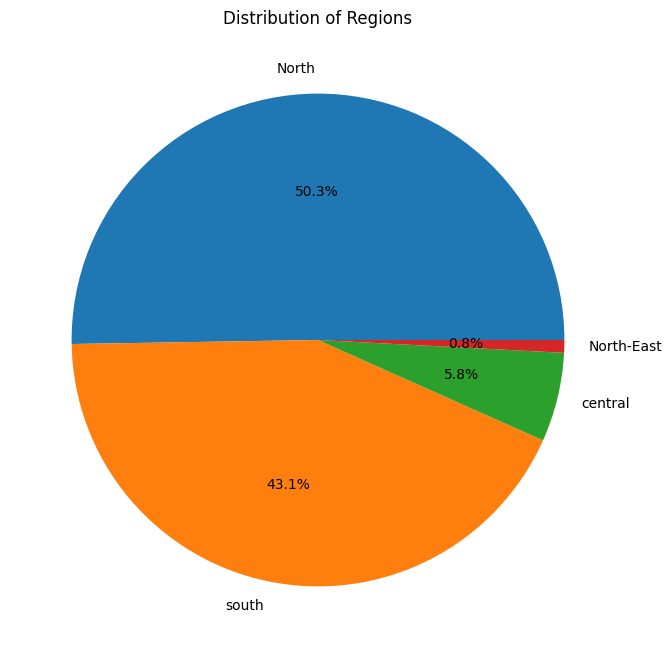

In [ ]:
# Pie chart for Region
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Regions')
plt.show()

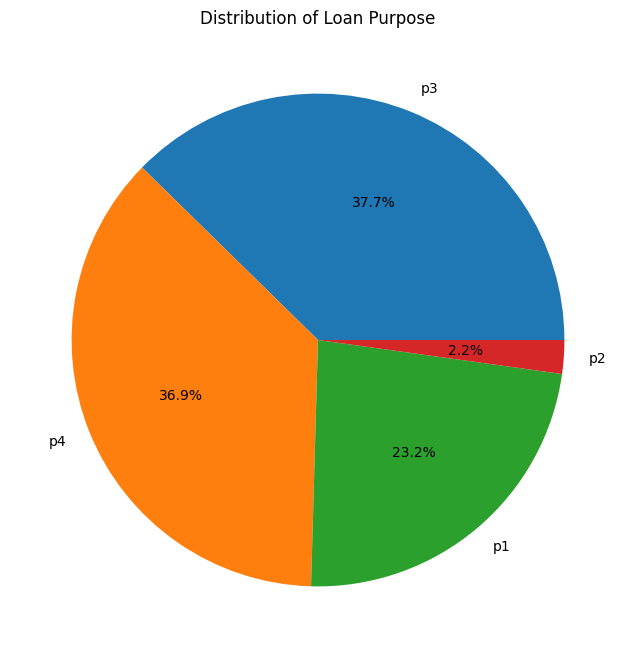

In [ ]:
# Pie chart for Loan Purpose
loan_purpose_counts = df['loan_purpose'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loan Purpose')
plt.show()

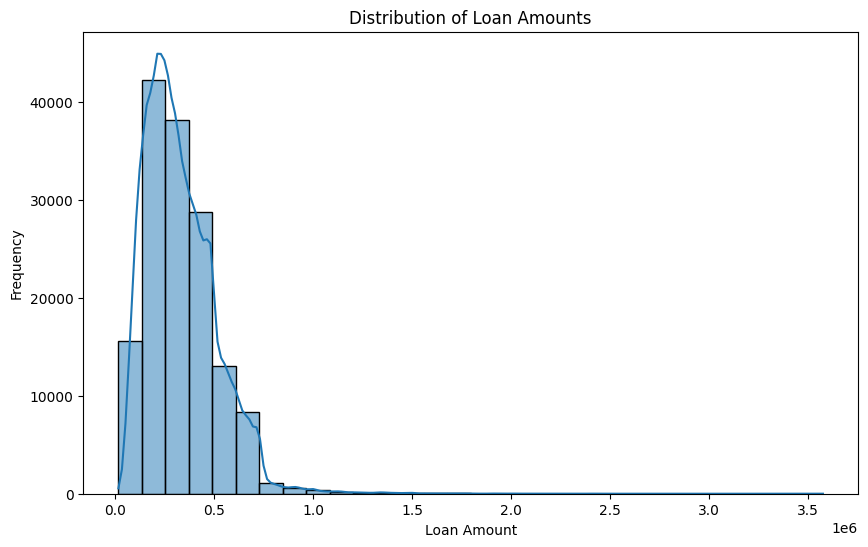

In [ ]:
# Distribution of Loan Amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

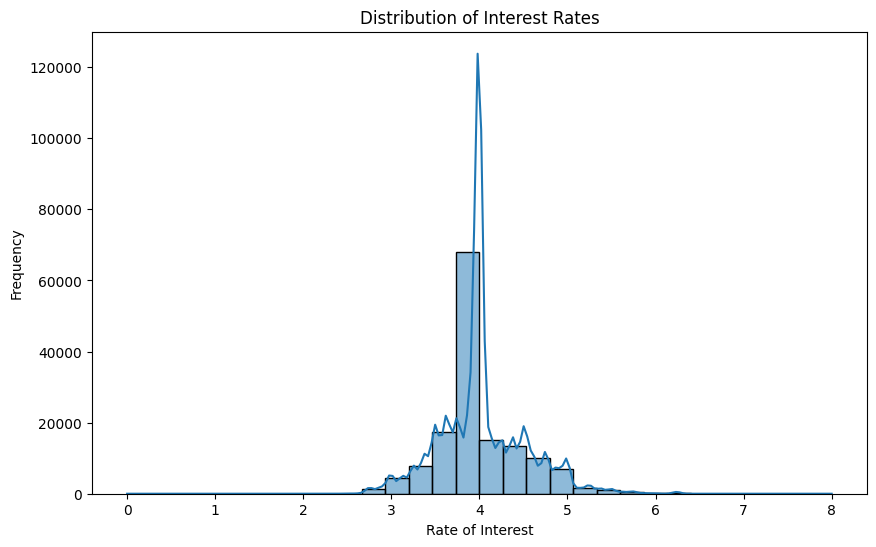

In [ ]:
# Distribution of Interest Rates

plt.figure(figsize=(10, 6))
sns.histplot(df['rate_of_interest'], kde=True, bins=30)
plt.title('Distribution of Interest Rates')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.show()

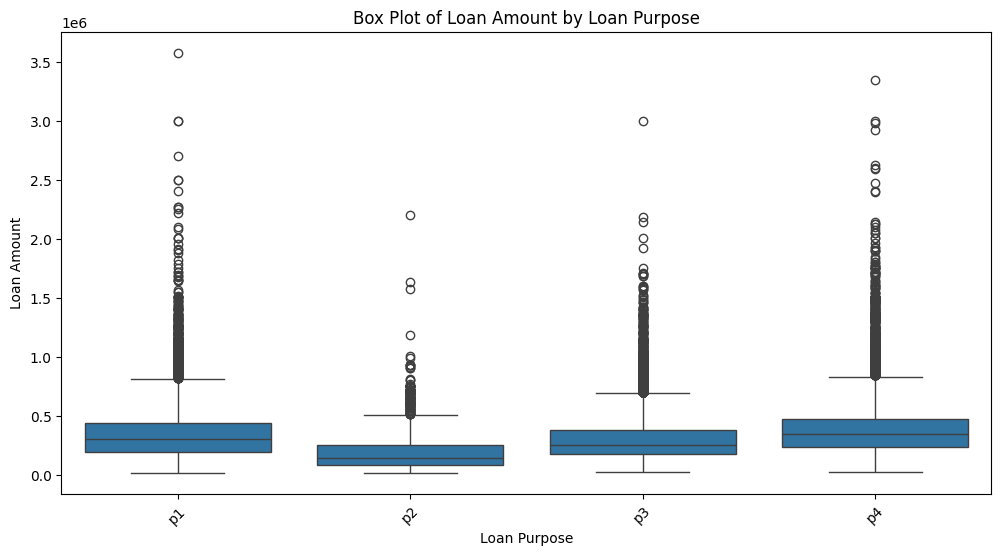

In [ ]:
# Box Plot of Loan Amount by Loan Purpose

plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_purpose', y='loan_amount', data=df)
plt.title('Box Plot of Loan Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

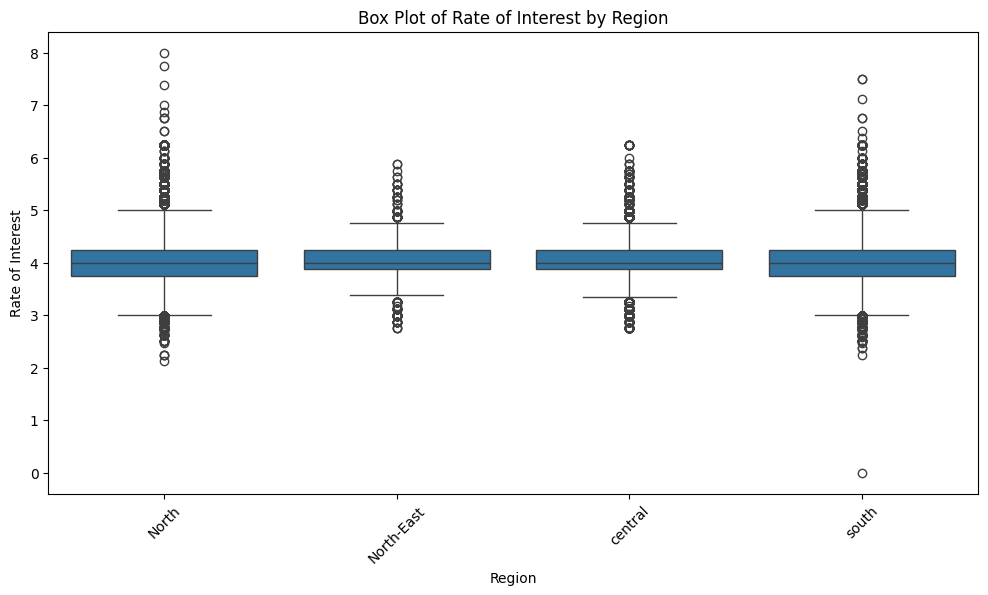

In [ ]:
# Box Plot of Rate of Interest by Region

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='rate_of_interest', data=df)
plt.title('Box Plot of Rate of Interest by Region')
plt.xlabel('Region')
plt.ylabel('Rate of Interest')
plt.xticks(rotation=45)
plt.show()

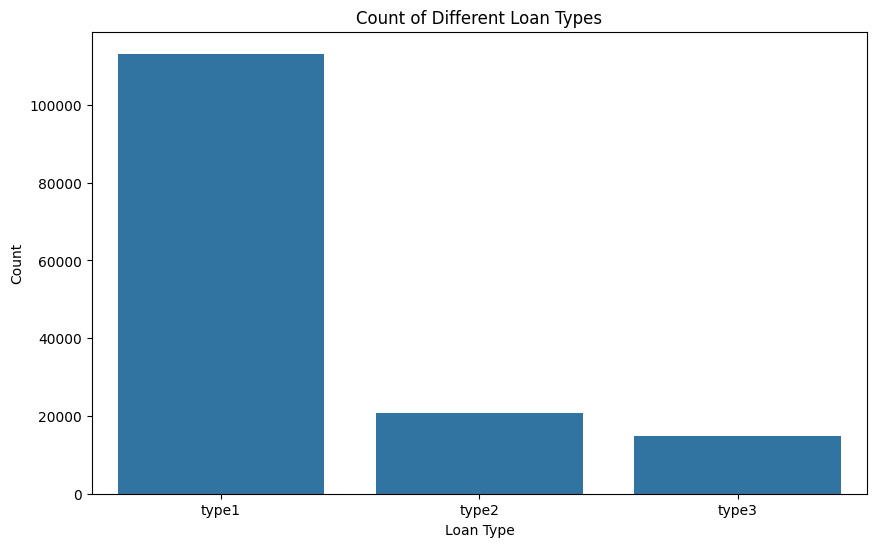

In [ ]:
# Bar Plot of Loan Types Count

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_type', data=df)
plt.title('Count of Different Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

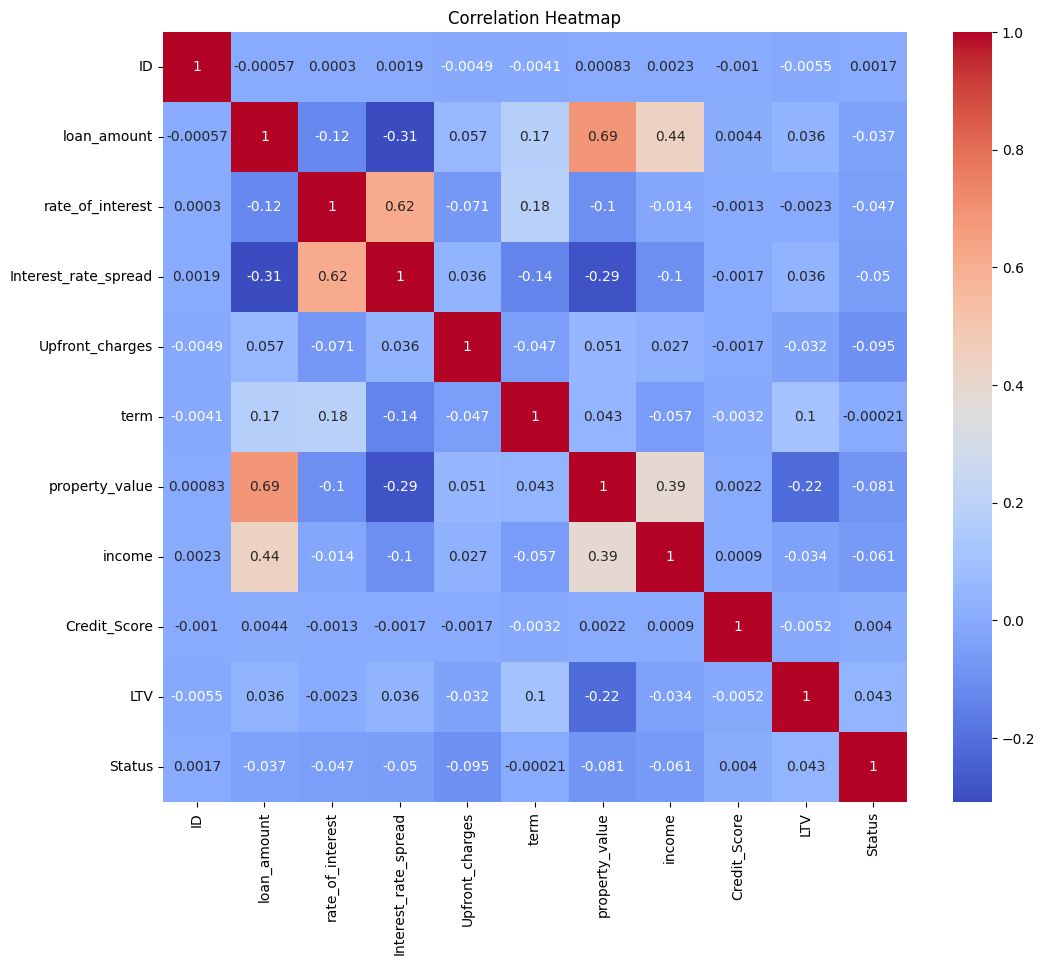

In [ ]:
# Heatmap of Correlation Between Features

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

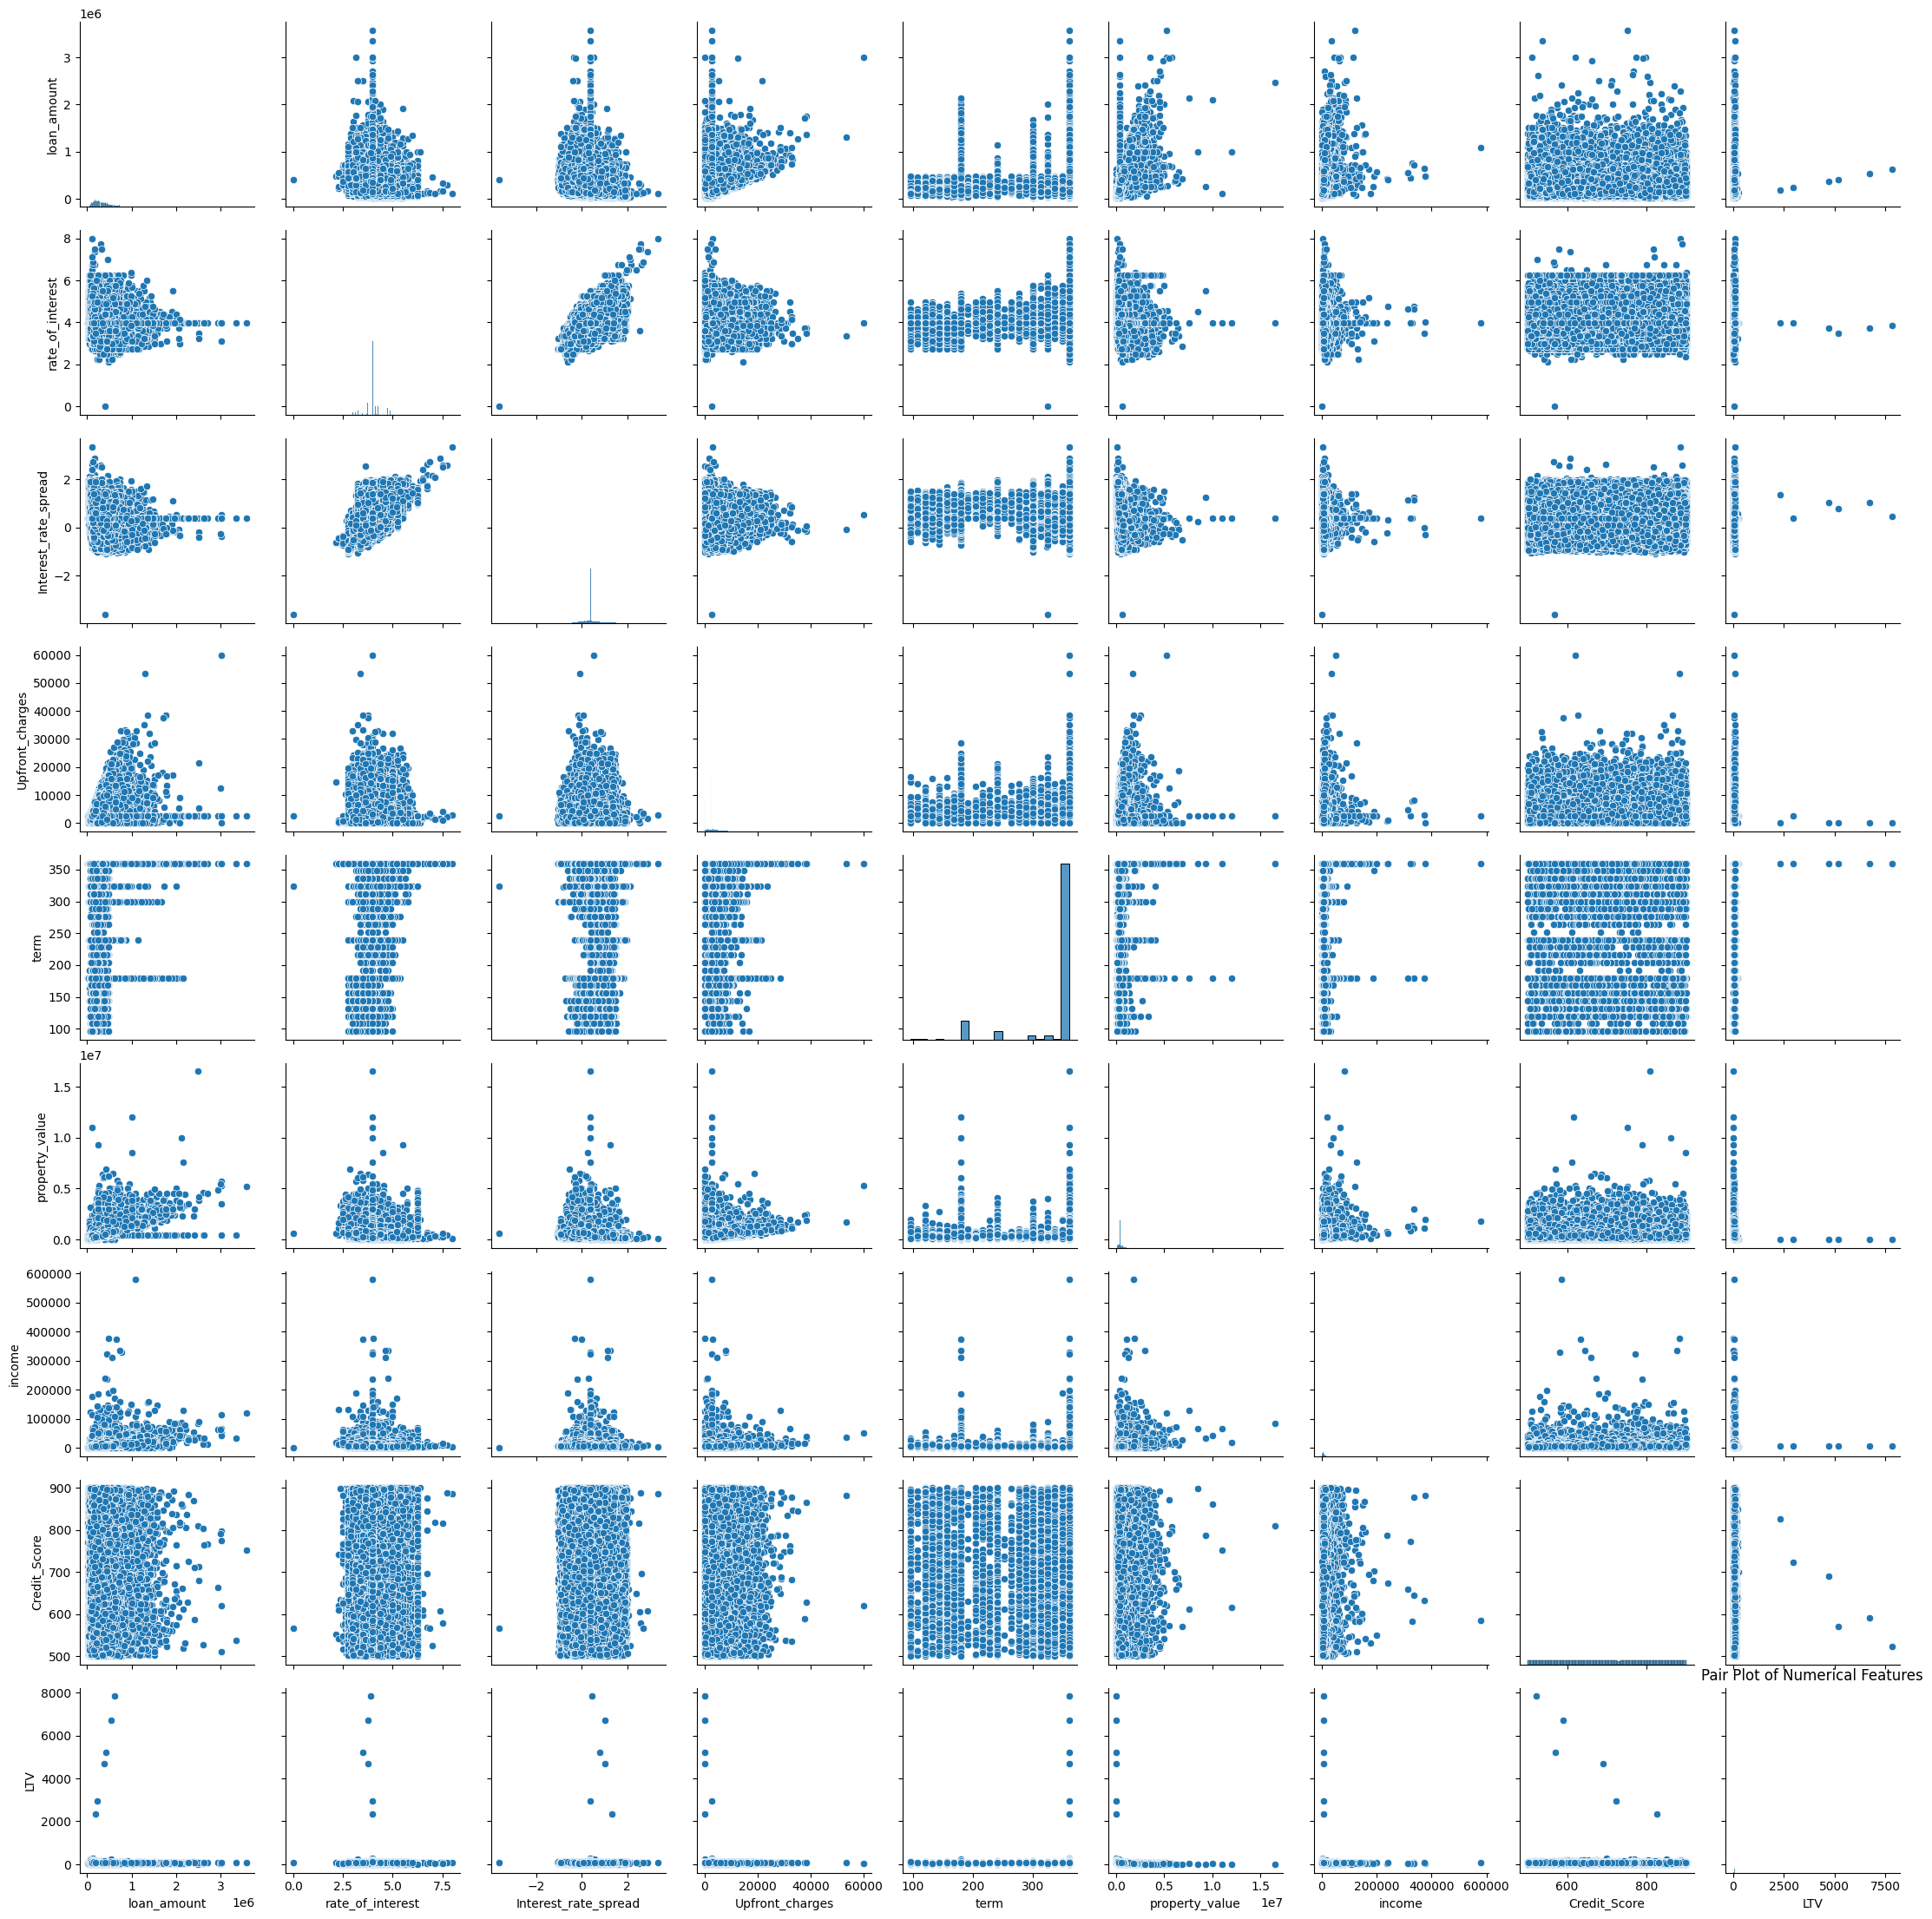

In [ ]:
# Pair Plot of Numerical Features

sns.pairplot(df[numerical_cols])
plt.title('Pair Plot of Numerical Features')
plt.show()

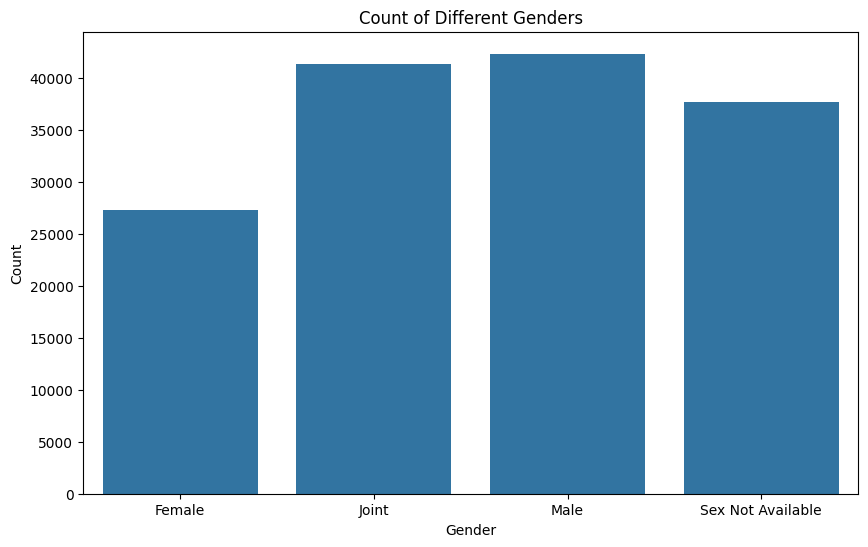

In [ ]:
# Count Plot of Gender

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Count of Different Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Feature Engineering

In [ ]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

Feature Selection (Numerical)

Numerical Features:
Index(['ID', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status'],
      dtype='object')


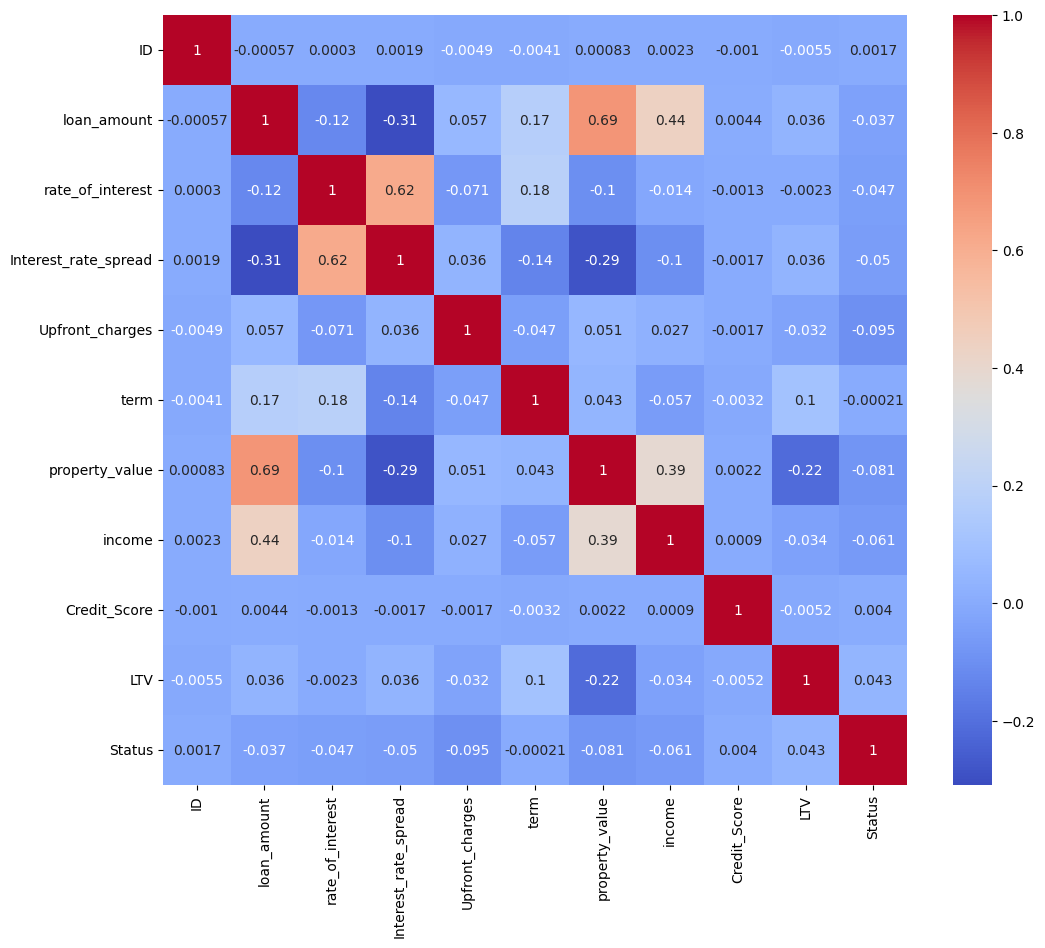

In [ ]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:")
print(numerical_features)

# Correlation heatmap using only numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm') # Calculate correlation on the numerical subset
plt.show()

One-Hot Encoding

In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())


      ID  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890       116500              3.99                0.3904   
1  24891       206500              3.99                0.3904   
2  24892       406500              4.56                0.2000   
3  24893       456500              4.25                0.6810   
4  24894       696500              4.00                0.3042   

   Upfront_charges   term  property_value   income  Credit_Score        LTV  \
0          2596.45  360.0        118000.0   1740.0           758  98.728814   
1          2596.45  360.0        418000.0   4980.0           552  75.135870   
2           595.00  360.0        508000.0   9480.0           834  80.019685   
3          2596.45  360.0        658000.0  11880.0           587  69.376900   
4             0.00  360.0        758000.0  10440.0           602  91.886544   

   ...  age_35-44  age_45-54  age_55-64  age_65-74  age_<25  age_>74  \
0  ...      False      False      False      False    False   

Data Splitting

Define Features and Target Variable

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Addressing Class Imbalance

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Check for NaNs in X_train_scaled
print("Number of NaNs in X_train_scaled:", pd.isna(X_train_scaled).sum().sum())

# Check for NaNs in y_train
print("Number of NaNs in y_train:", y_train.isna().sum())

# Impute NaNs using SimpleImputer (replace with your preferred strategy)
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Now apply SMOTE on the imputed data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled_imputed, y_train)

print("Number of NaNs in X_train_smote:", pd.isna(X_train_smote).sum().sum())
print("Number of NaNs in y_train_smote:", y_train_smote.isna().sum())
print("Class distribution in y_train_smote:")
print(y_train_smote.value_counts())
print("Class distribution in y_test:")
print(y_test.value_counts())

Number of NaNs in X_train_scaled: 0
Number of NaNs in y_train: 0
Number of NaNs in X_train_smote: 0
Number of NaNs in y_train_smote: 0
Class distribution in y_train_smote:
Status
1    78344
0    78344
Name: count, dtype: int64
Class distribution in y_test:
Status
0    33687
1    10914
Name: count, dtype: int64


Model Development (With SMOTE)

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Define the models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression()
xgb_model = XGBClassifier(random_state=42)
lda_model = LinearDiscriminantAnalysis()


# Fit models on the full training set
rf_model.fit(X_train_smote, y_train_smote)
logreg_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)
lda_model.fit(X_train_smote, y_train_smote)


LinearDiscriminantAnalysis()

Model Evaluation

In [99]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Impute NaNs in X_test_scaled using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)  # Use the fitted imputer

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled_imputed)

# Predictions for Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_scaled_imputed)


# Predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled_imputed)

#Predictions for LDA
y_pred_lda = lda_model.predict(X_test_scaled_imputed)

# Evaluation for Random Forest
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Evaluation for Logistic Regression
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# Evaluation for XGBoost
print("\nXGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Evaluation for LDA
print("\nLDA Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))



Random Forest Evaluation:
Accuracy: 0.9999551579560997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601


Confusion Matrix:
 [[33685     2]
 [    0 10914]]

Logistic Regression Evaluation:
Accuracy: 0.8300710746395821

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     33687
           1       0.65      0.67      0.66     10914

    accuracy                           0.83     44601
   macro avg       0.77      0.78      0.77     44601
weighted avg       0.83      0.83      0.83     44601


Confusion Matrix:
 [[29717  3970]
 [ 3609  7305]]

XGBoost Evaluation:
Accuracy: 0.9999327369341494

Classification Report:
   

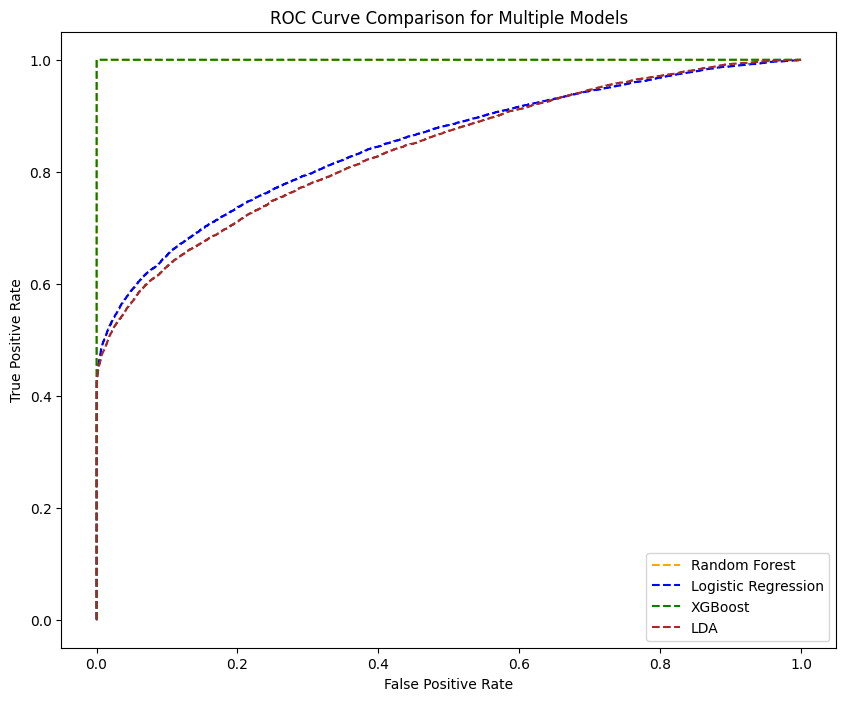

In [100]:
#AUC-ROC Curve (with smote)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Create a new figure to hold all ROC curves
plt.figure(figsize=(10, 8))

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='orange', label='Random Forest')

# ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, linestyle='--', color='blue', label='Logistic Regression')

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, linestyle='--', color='green', label='XGBoost')

# ROC Curve for LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_model.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_lda, tpr_lda, linestyle='--', color='brown', label='LDA')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models')
plt.legend()
plt.show()


In [101]:
# AUC-ROC scores(with somte)

from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC scores
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled_imputed)[:, 1])
auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled_imputed)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled_imputed)[:, 1])

# For Logistic Regression, convert to binary probabilities if needed
y_pred_lr_prob = logreg_model.predict(X_test_scaled_imputed) # Changed lr_model to logreg_model
y_pred_lr_prob = (y_pred_lr_prob > 0.5).astype(int)
auc_lr = roc_auc_score(y_test, y_pred_lr_prob)


auc_lda = roc_auc_score(y_test, lda_model.predict_proba(X_test_scaled_imputed)[:, 1])

print("AUC-ROC Score (Random Forest):", auc_rf)
print("AUC-ROC Score (Logistic Regression):", auc_logreg)
print("AUC-ROC Score (XGBoost):", auc_xgb)

print("AUC-ROC Score (LDA):", auc_lda)

# Determine the best model
best_model = max([(auc_rf, "Random Forest"), (auc_logreg, "Logistic Regression"), (auc_xgb, "XGBoost"), (auc_lda, "LDA")])[1]
print("\nBest Model based on AUC-ROC Score:", best_model)


AUC-ROC Score (Random Forest): 1.0
AUC-ROC Score (Logistic Regression): 0.8486276086260782
AUC-ROC Score (XGBoost): 0.9999694391489257
AUC-ROC Score (LDA): 0.8390656715535687

Best Model based on AUC-ROC Score: Random Forest


Model Development (Without SMOTE)

In [102]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np

# Impute NaNs in X_train_scaled before fitting the model
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Random Forest Classifier (Without SMOTE)
print("Random Forest (Without SMOTE)")
rf_model_no_smote = RandomForestClassifier(random_state=42)
rf_model_no_smote.fit(X_train_scaled_imputed, y_train)

# Logistic Regression (Without SMOTE)
print("\nLogistic Regression (Without SMOTE)")
logreg_model_no_smote = LogisticRegression(random_state=42)
logreg_model_no_smote.fit(X_train_scaled_imputed, y_train)

# XGBoost (Without SMOTE)
print("\nXGBoost (Without SMOTE)")
xgb_model_no_smote = XGBClassifier(random_state=42)
xgb_model_no_smote.fit(X_train_scaled_imputed, y_train)

print("\nLDA (Linear Discriminant Analysis)")
lda_model_no_smote = LinearDiscriminantAnalysis()
lda_model_no_smote.fit(X_train_scaled_imputed, y_train)





Random Forest (Without SMOTE)

Logistic Regression (Without SMOTE)

XGBoost (Without SMOTE)

LDA (Linear Discriminant Analysis)


LinearDiscriminantAnalysis()

In [104]:
# Model Evaluation (Without SMOTE)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Impute NaNs in X_test_scaled using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)  # Use the fitted imputer

# Predictions for Random Forest (Without SMOTE)
y_pred_rf_no_smote = rf_model_no_smote.predict(X_test_scaled_imputed) # Use X_test_scaled_imputed

# Predictions for Logistic Regression (Without SMOTE)
y_pred_logreg_no_smote = logreg_model_no_smote.predict(X_test_scaled_imputed) # Use X_test_scaled_imputed

# Predictions for XGBoost (Without SMOTE)
y_pred_xgb_no_smote = xgb_model_no_smote.predict(X_test_scaled_imputed) # Use X_test_scaled_imputed

# Predictions for LDA
y_pred_lda_no_smote = lda_model_no_smote.predict(X_test_scaled_imputed)


# Evaluation for Random Forest (Without SMOTE)
print("\nRandom Forest Evaluation (Without SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_no_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_no_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_no_smote))

# Evaluation for Logistic Regression (Without SMOTE)
print("\nLogistic Regression Evaluation (Without SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_no_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_no_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_no_smote))

# Evaluation for XGBoost (Without SMOTE)
print("\nXGBoost Evaluation (Without SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_no_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_no_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_no_smote))

# Evaluation for LDA (Withhout SMOTE)
print("\nLDA Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda_no_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda_no_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lda_no_smote))




Random Forest Evaluation (Without SMOTE):
Accuracy: 0.9999775789780498

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601


Confusion Matrix:
 [[33686     1]
 [    0 10914]]

Logistic Regression Evaluation (Without SMOTE):
Accuracy: 0.8694872312279994

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     33687
           1       0.94      0.50      0.65     10914

    accuracy                           0.87     44601
   macro avg       0.90      0.74      0.79     44601
weighted avg       0.88      0.87      0.85     44601


Confusion Matrix:
 [[33342   345]
 [ 5476  5438]]

XGBoost Evaluation (Without SMOTE):
Accurac

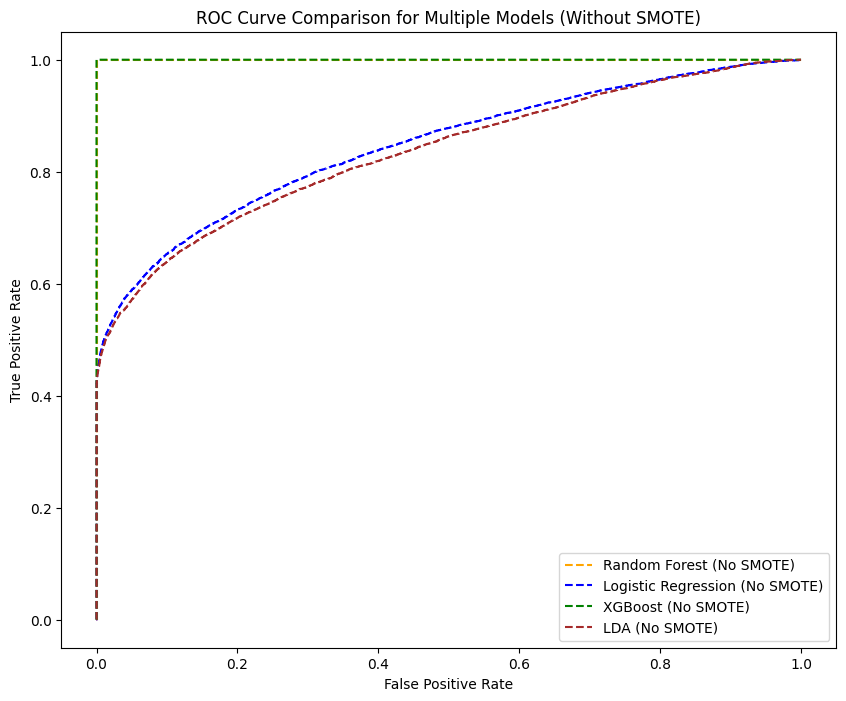

In [103]:
# ROC Curve (without smote)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Create a new figure to hold all ROC curves in one plot
plt.figure(figsize=(10, 8))

# ROC Curve for Random Forest (Without SMOTE)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='orange', label='Random Forest (No SMOTE)')

# ROC Curve for Logistic Regression (Without SMOTE)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, linestyle='--', color='blue', label='Logistic Regression (No SMOTE)')

# ROC Curve for XGBoost (Without SMOTE)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, linestyle='--', color='green', label='XGBoost (No SMOTE)')

# ROC Curve for LDA (Without SMOTE)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1])
plt.plot(fpr_lda, tpr_lda, linestyle='--', color='brown', label='LDA (No SMOTE)')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models (Without SMOTE)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Calculate AUC-ROC scores (Without SMOTE)

from sklearn.metrics import roc_auc_score

auc_rf_no_smote = roc_auc_score(y_test, rf_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1]) # Use X_test_scaled_imputed
auc_logreg_no_smote = roc_auc_score(y_test, logreg_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1]) # Use X_test_scaled_imputed
auc_xgb_no_smote = roc_auc_score(y_test, xgb_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1]) # Use X_test_scaled_imputed

# LDA AUC-ROC Score
auc_lda = roc_auc_score(y_test, lda_model_no_smote.predict_proba(X_test_scaled_imputed)[:, 1])

print("AUC-ROC Score (Random Forest - No SMOTE):", auc_rf_no_smote)
print("AUC-ROC Score (Logistic Regression - No SMOTE):", auc_logreg_no_smote)
print("AUC-ROC Score (XGBoost - No SMOTE):", auc_xgb_no_smote)
print("AUC-ROC Score (LDA - No SMOTE):", auc_lda)

# Determine the best model (Without SMOTE)
best_model_no_smote = max([(auc_rf_no_smote, "Random Forest"),
                           (auc_logreg_no_smote, "Logistic Regression"),
                           (auc_xgb_no_smote, "XGBoost"),
                           (auc_lda, "LDA")])[1]
print("\nBest Model based on AUC-ROC Score (Without SMOTE):", best_model_no_smote)



AUC-ROC Score (Random Forest - No SMOTE): 1.0
AUC-ROC Score (Logistic Regression - No SMOTE): 0.8463980446860808
AUC-ROC Score (XGBoost - No SMOTE): 1.0
AUC-ROC Score (LDA - No SMOTE): 0.8358018674637835

Best Model based on AUC-ROC Score (Without SMOTE): XGBoost


Model Interpretation

In [ ]:
#  upgrade shap

!pip install --upgrade shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.7 MB/s eta 0:00:00


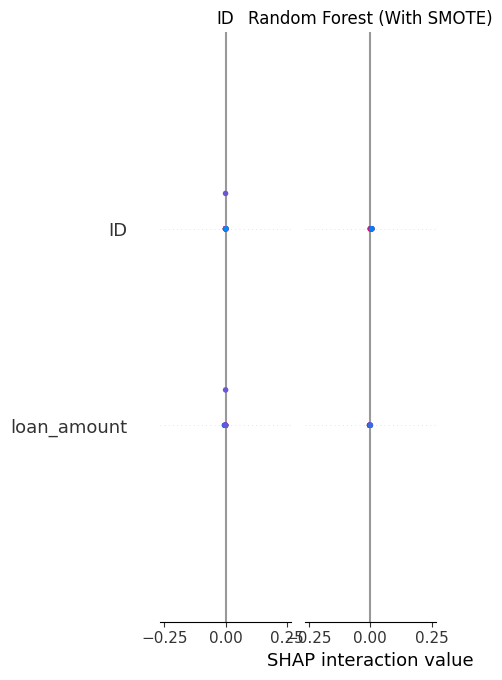

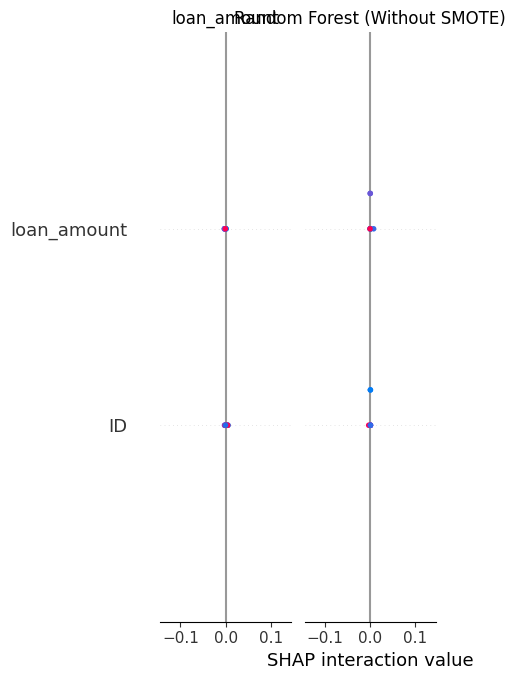

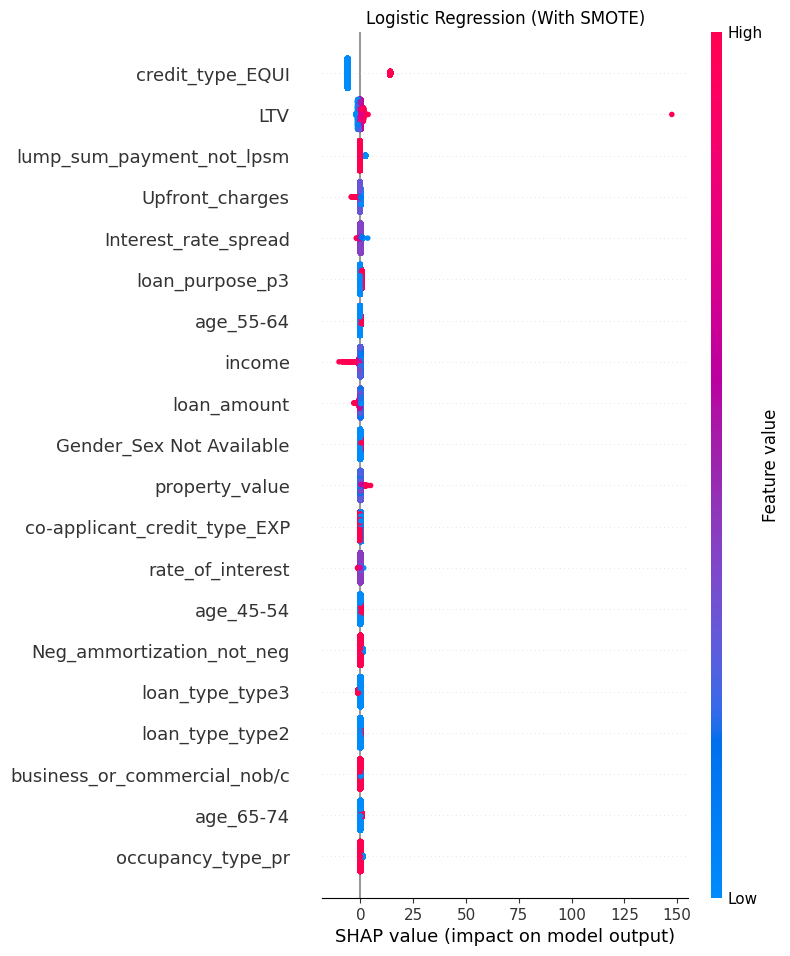

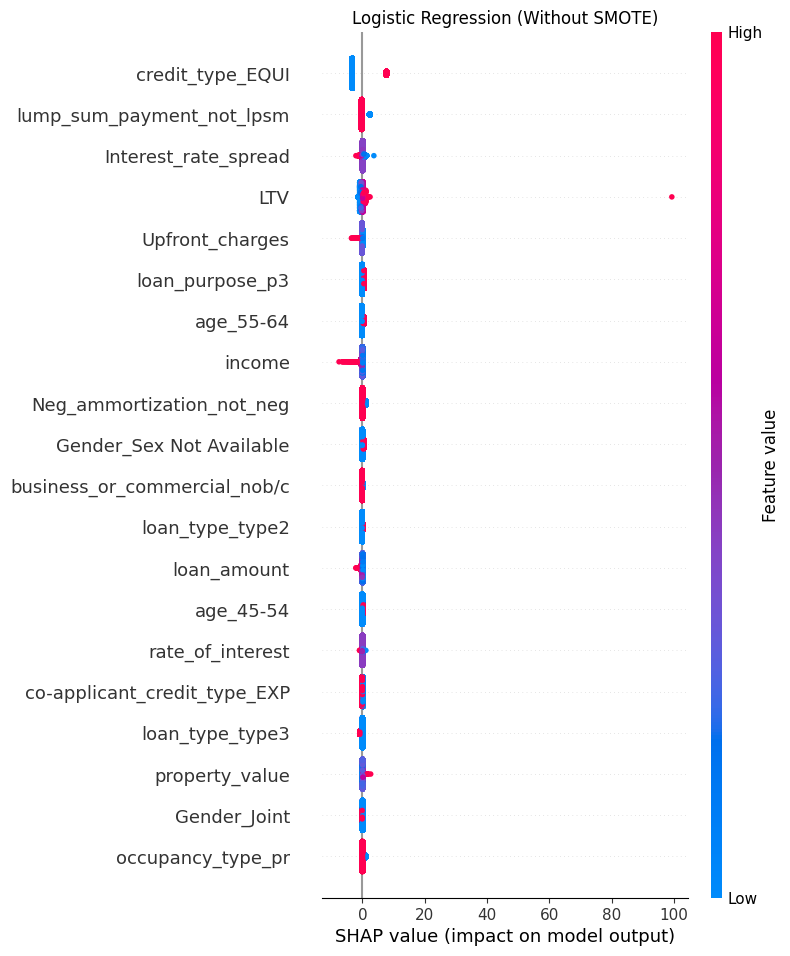

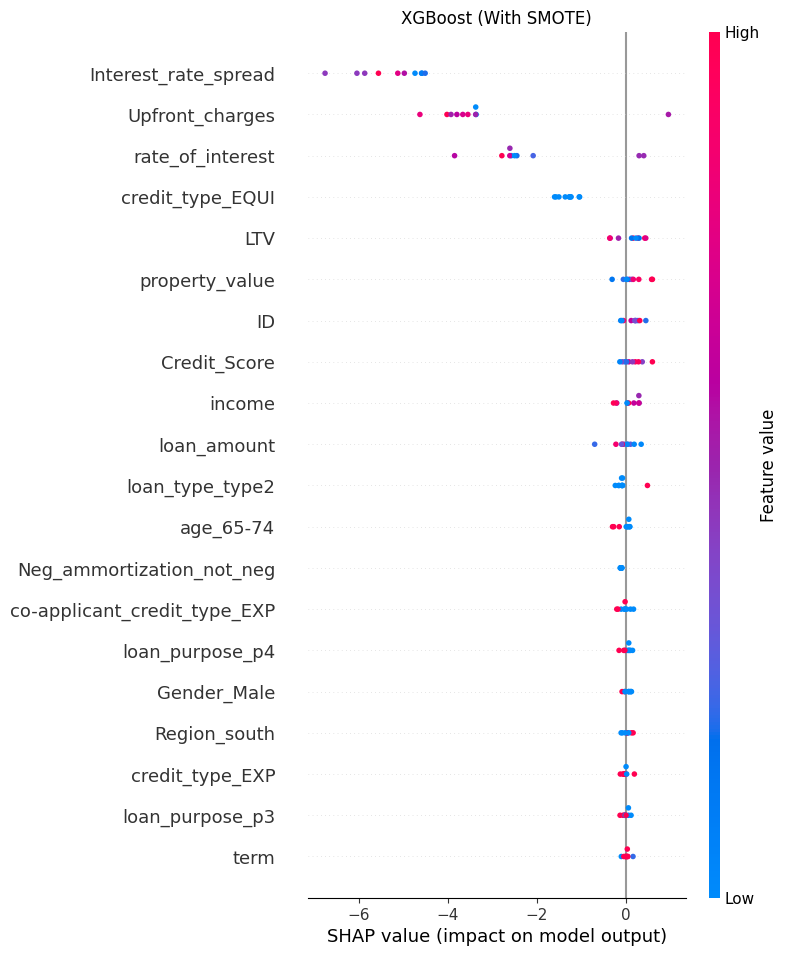

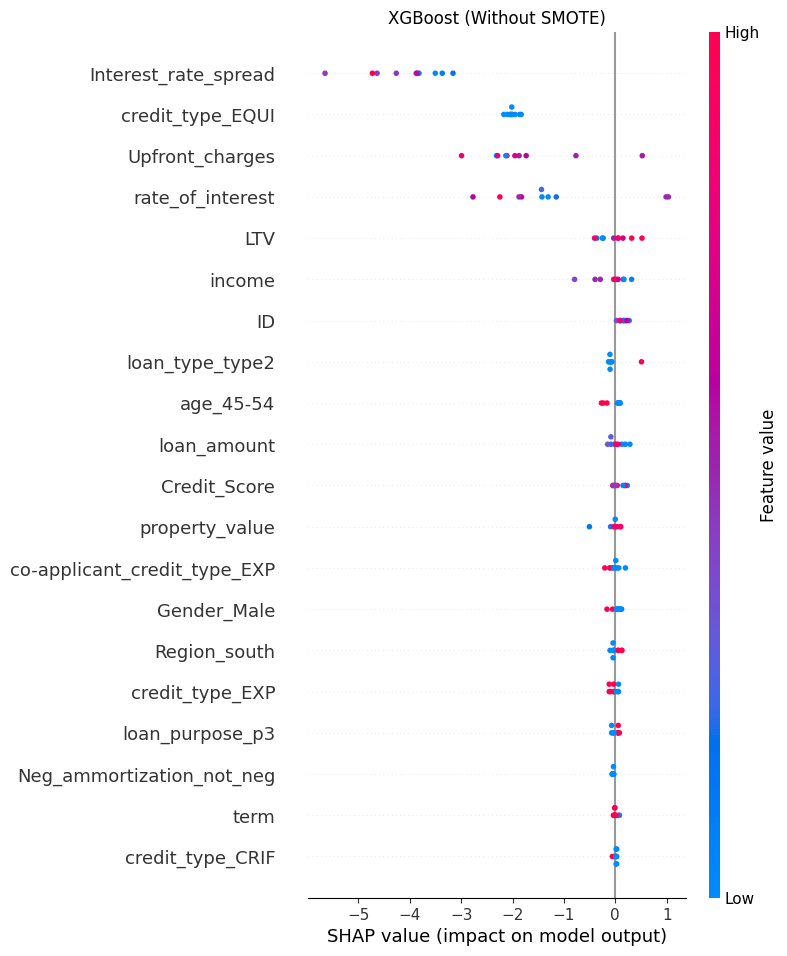

  0%|          | 0/10 [00:00<?, ?it/s]

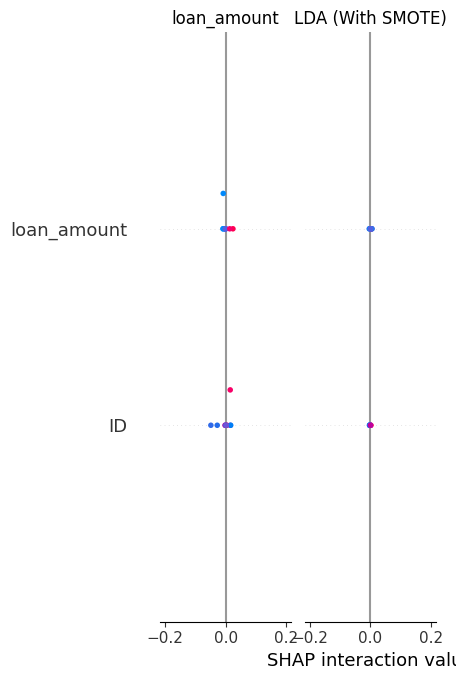

  0%|          | 0/10 [00:00<?, ?it/s]

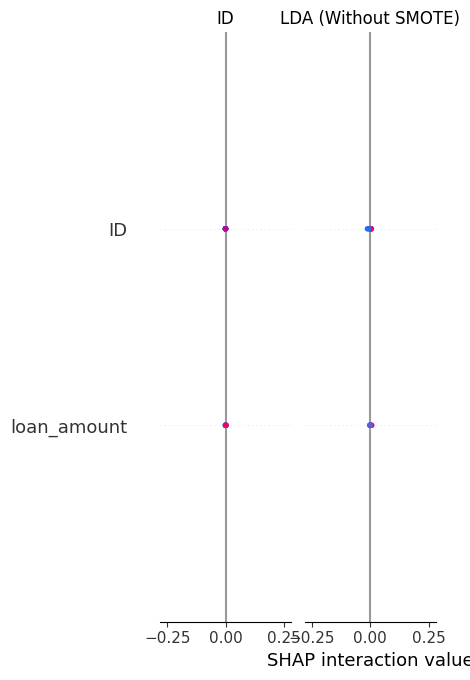

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Set a sample size for the test set
sample_size = 10
X_test_sample = X_test_scaled_imputed[:sample_size]

# Random Forest (With SMOTE)
explainer_rf_smote = shap.TreeExplainer(rf_model)
shap_values_rf_smote = explainer_rf_smote.shap_values(X_test_scaled_imputed[:sample_size])
shap.summary_plot(shap_values_rf_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('Random Forest (With SMOTE)')
plt.show()

# Random Forest (Without SMOTE)
explainer_rf_no_smote = shap.TreeExplainer(rf_model_no_smote)
shap_values_rf_no_smote = explainer_rf_no_smote.shap_values(X_test_scaled_imputed[:sample_size])
shap.summary_plot(shap_values_rf_no_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('Random Forest (Without SMOTE)')
plt.show()

# Logistic Regression (With SMOTE)
explainer_logreg_smote = shap.LinearExplainer(logreg_model, X_train_smote[:sample_size])
shap_values_logreg_smote = explainer_logreg_smote.shap_values(X_test_scaled_imputed)
shap.summary_plot(shap_values_logreg_smote, X_test_scaled_imputed, feature_names=X.columns, show=False)
plt.title('Logistic Regression (With SMOTE)')
plt.show()

# Logistic Regression (Without SMOTE)
explainer_logreg_no_smote = shap.LinearExplainer(logreg_model_no_smote, X_train_scaled_imputed[:sample_size])
shap_values_logreg_no_smote = explainer_logreg_no_smote.shap_values(X_test_scaled_imputed)
shap.summary_plot(shap_values_logreg_no_smote, X_test_scaled_imputed, feature_names=X.columns, show=False)
plt.title('Logistic Regression (Without SMOTE)')
plt.show()

# XGBoost (With SMOTE)
explainer_xgb_smote = shap.TreeExplainer(xgb_model)
shap_values_xgb_smote = explainer_xgb_smote.shap_values(X_test_scaled_imputed[:sample_size])
shap.summary_plot(shap_values_xgb_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('XGBoost (With SMOTE)')
plt.show()

# XGBoost (Without SMOTE)
explainer_xgb_no_smote = shap.TreeExplainer(xgb_model_no_smote)
shap_values_xgb_no_smote = explainer_xgb_no_smote.shap_values(X_test_scaled_imputed[:sample_size])
shap.summary_plot(shap_values_xgb_no_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('XGBoost (Without SMOTE)')
plt.show()

# Linear Discriminant Analysis (With SMOTE)
explainer_lda_smote = shap.KernelExplainer(lda_model.predict_proba, X_train_smote[:sample_size])
shap_values_lda_smote = explainer_lda_smote.shap_values(X_test_sample)
shap.summary_plot(shap_values_lda_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('LDA (With SMOTE)')
plt.show()

# Linear Discriminant Analysis (Without SMOTE)
explainer_lda_no_smote = shap.KernelExplainer(lda_model_no_smote.predict_proba, X_train_scaled_imputed[:sample_size])
shap_values_lda_no_smote = explainer_lda_no_smote.shap_values(X_test_sample)
shap.summary_plot(shap_values_lda_no_smote, X_test_sample, feature_names=X.columns, show=False)
plt.title('LDA (Without SMOTE)')
plt.show()
